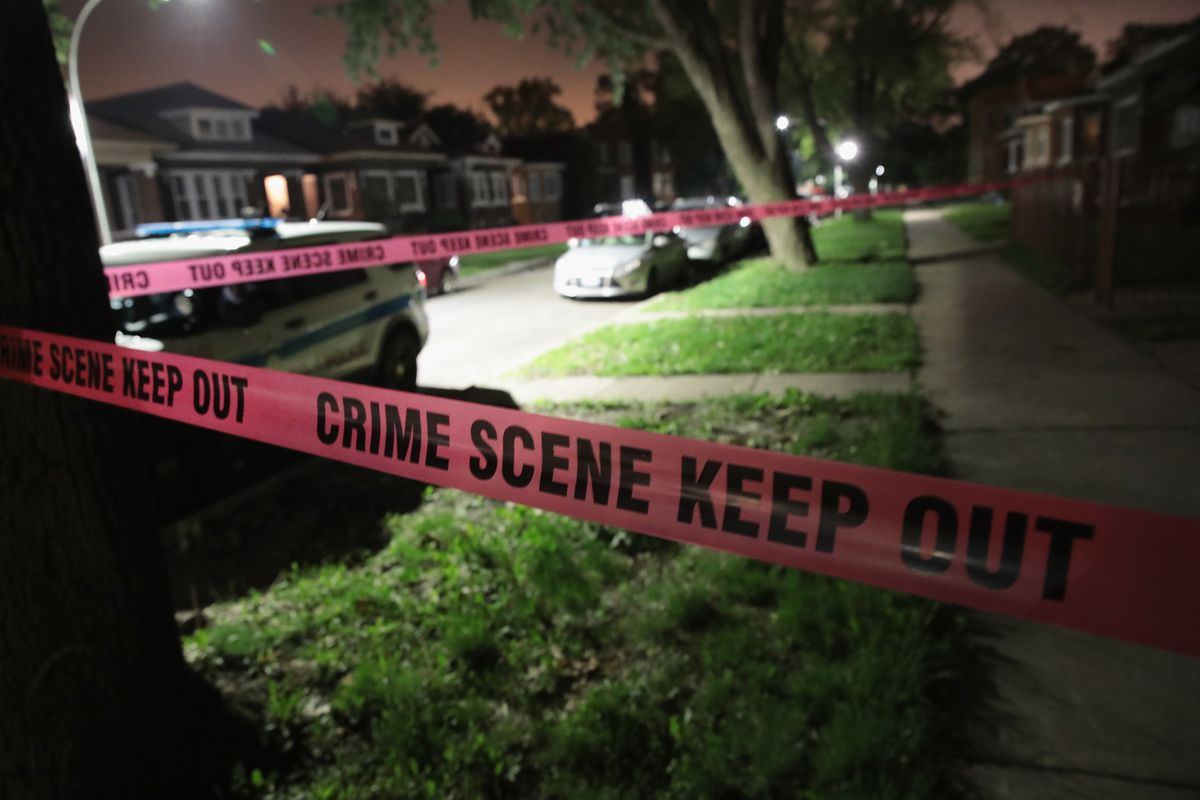

In [1]:
from IPython.display import Image
Image(filename='data/chicago.jpg',width = "800",height = "200")

# Investigating Crime In Chicago City
Group: pract_04-tue-1pm-_group-c

**Members**: 
* Canh Thanh Nguyen (45551936)
* Jarred Reilly (43264204)
* Soham Sarfare (45812748)
* Sukhmani Arora (45574715)

## Summary
Chicago, the third most populous city in the United States of America, has a crime problem. Violent crime per capita in Chicago is almost three times the national average, and in 2016 the city saw a large surge in homicides while the rest of the nation's crime rates remain near historic lows [1] [2] [3]. As Chicago is a unique case, we plan to do an investigation into what factors impact when, where, what, and how many times crimes occur across the city given a time range. This is possible because the City of Chicago releases huge amounts of data that's freely available to the public for analysis [4]. Many of the datasets are updated daily and stretch back many years, which is prefect for a detailed analysis.
## Goal
Our goal is to do a thorough analysis of the factors influencing crime in the City of Chicago with the help of modelling and visualisation techniques. While we won't be finding any solutions to the problems facing Chicago, we do hope to bring to light some of the key factors affecting the city's crime problem.

## Data Sources
Our plan is to use three public data sets provided by the City of Chicago:
1. Chicago Reported Crimes: In CSV format, this dataset contains records of 10 million crimes reported to police in Chicago from 2001 to present. As this is a huge data set, we have decided to use a subset of crimes which have occurred in the last 5 years. This data is originally from the Chicago Police Department's CLEAR (Citizen Law Enforcement Analysis and Reporting) system [5].    
2. Chicago Socioeconomic Factors: In CSV format, this dataset contains socioeconomic indicators for all community areas in Chicago. This data is originally from the 2012 Census and contains information like unemployment rate, per capita income, and hardship index [6].	
3. Chicago Police Stations: In CSV format, this dataset contains the location of all the police stations the city of Chicago. This could be useful to discover if there's positive or negative correlations between the location of crime and location of police stations [7].  
4. Chicago City 2017 Demographics: In PDF format, this file contains the racial and age demographics of the city of Chicago in 2017, as well as population, for each of the community area. The file has been exported into an .xlxs file to be import into the notebooks [8].
  
The project will also use 2 shape-files of the city of Chicago to visualise the geographic structure of the city. This will be used in the visualisations of crime distribution across the community areas or districts of Chicago.

## Data Preparation
We have extensive data preparation planned to ensure quality data for our later analysis.
1. Analyze the data for missing values or duplicates and apply techniques to remedy these where appropriate.  
2. Combine Chicago crimes, socioeconomic, and police station datasets.  
3. Explore correlations between the variables in the datasets.  
4. Investigate the distribution of variables within the datasets and handle outliers.  
5. The crimes dataset consists of 10 million crimes, so we plan to use a subset of the original dataset. Depending on the distribution results we may do this randomly, or try to improve the representation of values in the subset.

## Planned Techniques
1. Multinomial logistic regression to establish a baseline model for predicting crimes across Chicago. This will help us investigate which factors influence different types of crimes.  
2. Compare the baseline results with other classification techniques, such as: support-vector machines, k-nearest neighbors, and artificial neural networks.   
3. Visualise the regional differences in crime using a heat map overlaid on a map of Chicago.  

## Project Plan
1. By week 8 we plan to have completed the data preparation component of our investigation. This is the most important part to get right, as without quality data our models and analysis will be worthless.   
2. By week 10 we plan to have a fine-tuned baseline model and to have made at least two different classifiers to compare the baseline results with.    
3. By week 12 we plan to finish our visualisations of the data, the most important being a heat map to explore regional distribution of different types of crime.

## Extra packages used
1. Geopandas plotting module. To install, run this in anaconda prompt (conda install geopandas), remove open and closing brackets.
2. Imbalanced learning module. To install, run this in anaconda prompt (conda install -c conda-forge imbalanced-learn), remove open and closing brackets.
3. Yellowbrick module. To install, run this in anaconda prompt (conda install -c districtdatalabs yellowbrick), remove open and closing brackets.

## References
[1] https://www.usnews.com/news/articles/2016-09-19/chicago-drives-uptick-in-murders-national-crime-rate-stays-near-historic-lows  
[2] http://www.city-data.com/crime/crime-Chicago-Illinois.html  
[3] http://time.com/4497814/chicago-murder-rate-u-s-crime/  
[4] https://data.cityofchicago.org/     
[5] https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present/ijzp-q8t2   
[6] https://data.cityofchicago.org/Health-Human-Services/Census-Data-Selected-socioeconomic-indicators-in-C/kn9c-c2s2   
[7] https://data.cityofchicago.org/Public-Safety/Police-Stations/z8bn-74gv  
[8] http://www.actforchildren.org/wp-content/uploads/2018/01/Census-Data-by-Chicago-Community-Area-2017.pdf

# Preliminary Investigation of variable's distribution

### *The main goal of this project is to analyse the factors which lead to crime in Chicago,making visualisations out of them and present them in a way which is user friendly and compatible for a reader to use and go through it.*
<span style="color:blue"> **This project does not really provides a solution to these crimes but just the factors that cause crime.* </span>

##### Importing libraries with alias which are required in further analysis.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt

#### The csv data file Chicago_Merged includes all the required information for the analysis of this project, hence it is read below and a dataframe is being created along with displaying all the columns present in the data.

In [2]:
df = pd.read_csv('data\Chicago_Merged.csv')
df = df.select_dtypes(include=[np.number])
columns = df.select_dtypes(include=[np.number]).columns.tolist()
print(columns)

['Unnamed: 0', 'ID', 'Beat', 'District', 'Ward', 'Community Area', 'X Coordinate', 'Y Coordinate', 'Year', 'Latitude', 'Longitude', 'Historical Wards 2003-2015', 'Zip Codes', 'Community Areas', 'Census Tracts', 'Wards', 'Boundaries - ZIP Codes', 'Police Districts', 'Police Beats', 'PERCENT OF HOUSING CROWDED', 'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED', 'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT AGED UNDER 18 OR OVER 64', 'PER CAPITA INCOME ', 'HARDSHIP INDEX']


C:\Users\nctha\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Visualising the distribution of afew variables which have numerical values, using boxplots. The variables used in this are:
* ***Community Area***: After looking at the number of appearances of crimes for all the community areas , we can know that which community areas face more amount of crimes as compared to other areas.


* ***Latitude And Longitude***: The "latitude"  of a point on Earth's surface is the angle between the equatorial plane and the straight line that passes through that point and through (or close to) the center of the Earth whereas the "longitude"  of a point on Earth's surface is the angle east or west of a reference meridian to another meridian that passes through that point.

 ***Therefore, the distribution of latitude and longitude allows us to give some more preliminary projections on the fact that geographically, which location faces more crimes.***
* ***Year***: Allows us to get more familiar with crime rate as it tells about the period/time in which most crimes took place.


* ***Various socio-economic metrics***: For example: (percentage of-housing crowded,households below poverty,16+ unemployed people, 25+ without diploma),per capita income. These factors may also allow crime to happen as overcrowding invites crime, poverty stricken population,unemployment, low literacy rates may lead to performance of more crimes.




In [3]:
columns = ['Community Area', 'Latitude', 'Longitude','Year','PERCENT OF HOUSING CROWDED', 
           'PERCENT HOUSEHOLDS BELOW POVERTY', 'PERCENT AGED 16+ UNEMPLOYED', 
           'PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA', 'PERCENT AGED UNDER 18 OR OVER 64', 
           'PER CAPITA INCOME ', 'HARDSHIP INDEX']

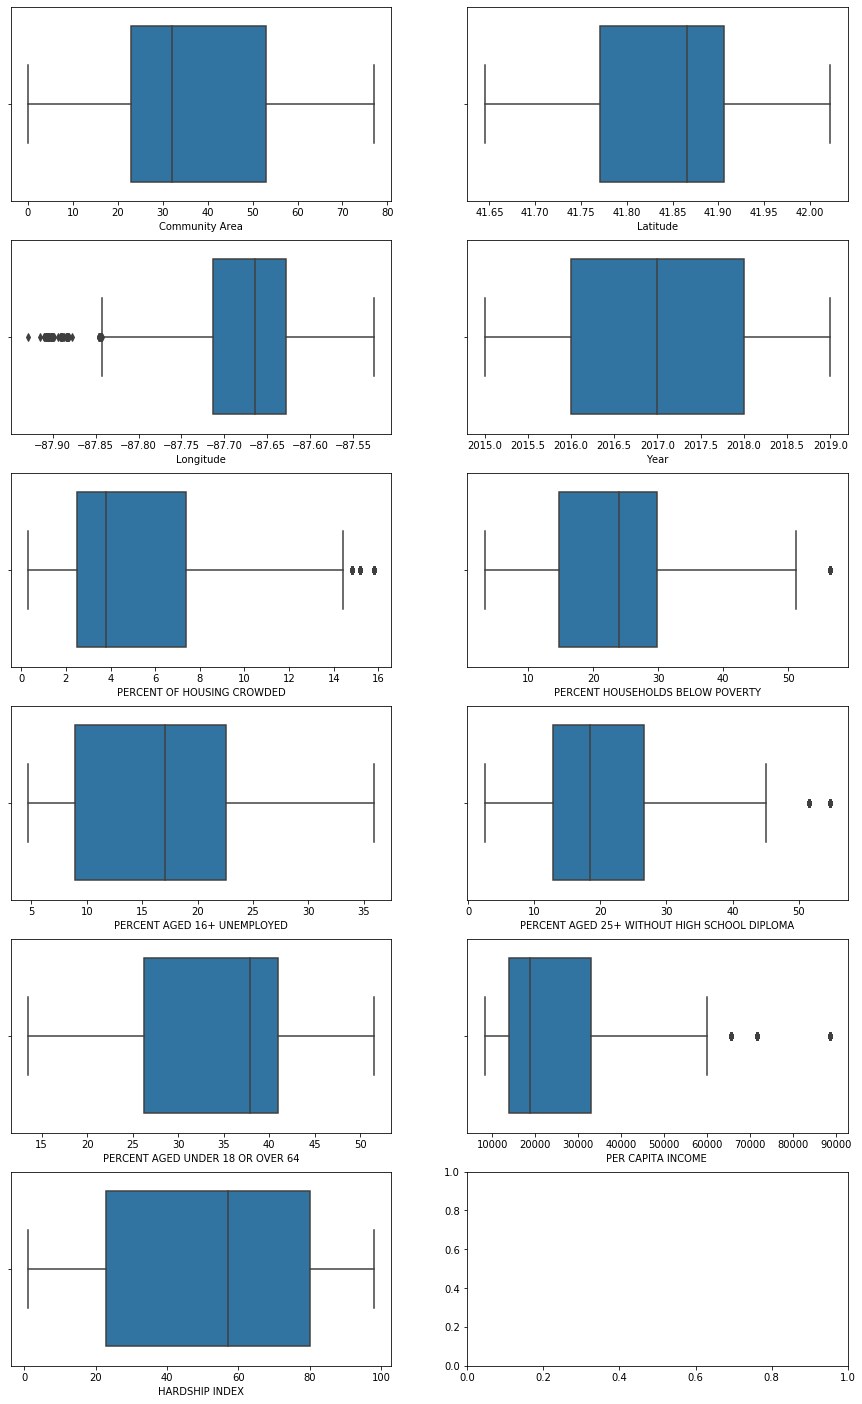

In [4]:
box, axes = plt.subplots(nrows = 6, ncols = 2, figsize=(15,25))
box.patch.set_facecolor('white')
for i in range(len(columns)):
    box = sns.boxplot(x = df[columns[i]], ax = axes[int(i/2)][int(i%2)])
    box.set_xlabel(str(columns[i]))

plt.show()

### First-look inferences


*  <span style="color:blue"> ***Latitude and Longitude*** </span>:

  - The greater the latitude the more northwards the location is, whereas the greater the longitude , the more eastwards the location is.
  - Looking at the distribution of crimes based on latitude and longitute, we can generally observe that more crimes are seen happening at the east side of the city and thins down when coming towards west.
  - When it comes to longitude, we see that distribution of the criminal activities are normally skewed towards the left with outliers(which should be removed if we want no crime).
  - More clarification on distribution of crimes in accordance with latitude and longitude will be analysed further with the help of heatmaps.
  
* <span style="color:blue"> ***Community Area*** </span>: 
    - The median value lies between community area 30-40 hence the 30-40 represents the area number. This boxplot just shows which are number faced more crimes.
    
* <span style="color:blue"> ***Percent of housing crowded*** </span>:
    - About 2%-4% out of area in Chicago which has housing crowded is vulnerable to more crimes.Few outliers can be seen between 14-16 which means that this range of percentage does not lie in the boxplot or where expected and hence this percentage does not commit any crimes.
    
* <span style="color:blue"> ***Percent household below poverty*** </span>:
    - 20-30% of household below poverty are facing more crimes.This might be happening because these people do not have any jobs, money for a living, hence in order to get all this they commit crimes.One outlier may be noticed.

* <span style="color:blue"> ***Percent aged 16+ unemployed and 25+ without high school diploma*** </span>:
    - 15-20% and 10-20% of people respectively for above stated factors are responsible for crimes as these people are unemployes and maybe become depressed because of less achievements and hence commit more crimes. Outliers may be noticed at 50+-% which states that this factor(25+ without diploma) which does not leads to crimes when it comes to 50% and more.
    
* <span style="color:blue"> ***Per capita Income*** </span>: 
    - A person who's income is between 10000-20000 is more vulnerable to commit crime like burglary,robbing,murders as they might want more money, murder someone to get their property, cash, any commodity. There are outliers between 60000-90000 which are expected as very less percentage of people with this income would commit crime due to their reputation,status, wealth.